1. Ниже приведен код для считывания датасета, содержащего рукописные цифры. Это известный набор французского ученого Яна Ле Куна Mnist, содержащий 60 тыс. картинок арабских цифр размером 28x28. Для тестирования результатов на реальных данных подготовьте свои картинки (например, в Paint), при этом изображение сделайте близким к квадратному и размер задайте небольшой, в то же время толщина кисти, которой Вы будете писать цифры, должна быть существенной.

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [3]:
#Создадим список с названиями классов
classes = ['ноль', 'один', 'два', 'три', 'четыре', 'пять', 'шесть', 'семь', 'восемь', 'девять']

In [4]:
#Загрузим данные из набора французского ученого Яна Ле Куна Mnist, содержащего 60 тыс. картинок арабских цифр размером 28x28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
#Выведем информацию о загруженных наборах
print('Размер коллекции для обучения: ',x_train.shape)
print('Размер коллекции для тестирования: ',x_test.shape)

Размер коллекции для обучения:  (60000, 28, 28)
Размер коллекции для тестирования:  (10000, 28, 28)


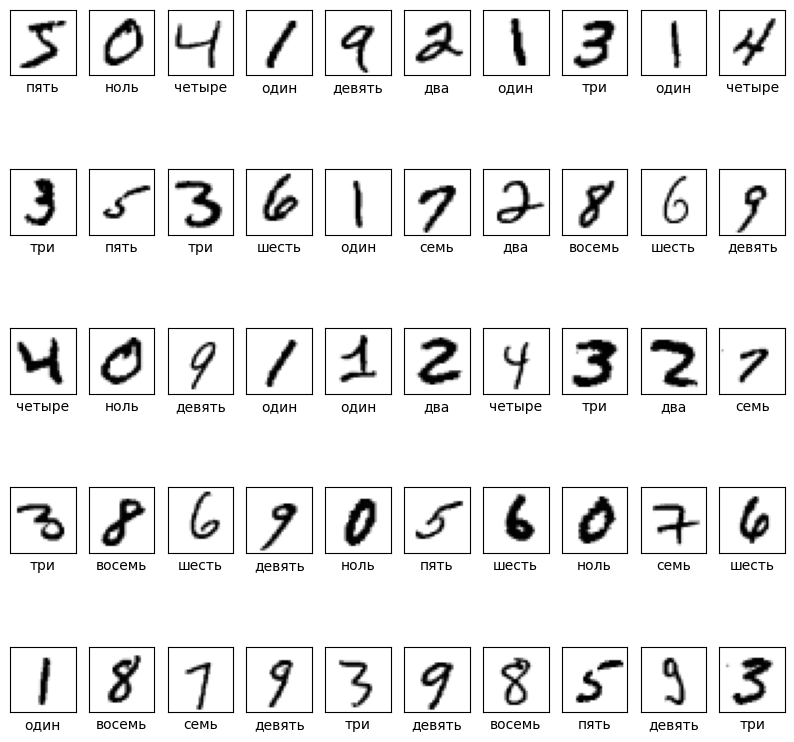

In [6]:
#отобразим часть изображений
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [7]:
# для использования необходимо преобразовать данные о пикселях картинки из 2D в 1D
# 28 x 28 = 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
#x_train[0]

In [8]:
#Значение интенсивности пикселей в изображении находится в интервале [0,255].
#Для наших целей их необходимо нормализовать - привести к значениям в интервале [0,1].
x_train = x_train / 255
x_test = x_test / 255

In [9]:
#Посмотрим, как выглядит ответ
print(y_train[0])
print(type(y_train[0]))

5
<class 'numpy.uint8'>


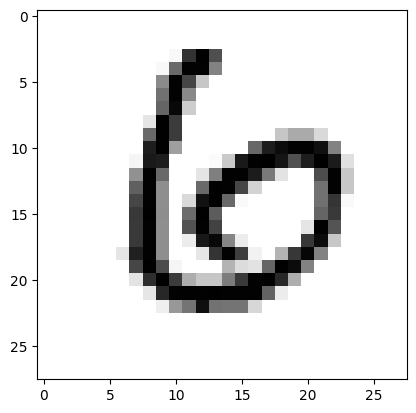

In [10]:
#Выведем изображение
n_test = 11
plt.imshow(x_test[n_test].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [11]:
#Загружаем изображения с диска
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(
      name=fn, length=len(uploaded[fn])))

Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Файл(ы) "0.jpg" размером 4415 байт загружен(ы)
Файл(ы) "1.jpg" размером 2738 байт загружен(ы)


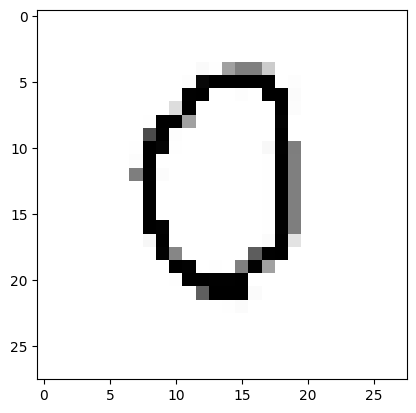

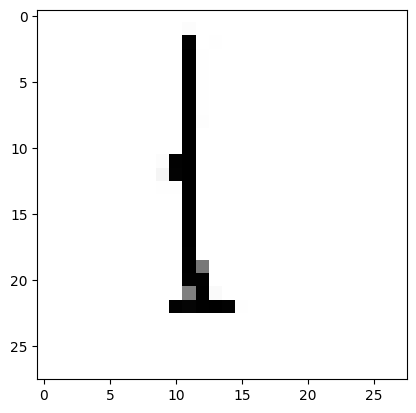

In [12]:
for fn in uploaded.keys():
  img = image.load_img(fn, target_size=(28, 28), color_mode = "grayscale")
  plt.imshow(img.convert('RGBA'))
  plt.show()
#Преобразуем картинку для обработки нейронной сетью
# Преобразуем картинку в массив
  x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
  x = x.reshape(1, 784)
# Инвертируем изображение
  x = 255 - x
# Нормализуем изображение
  x /= 255